In [20]:
import pandas as pd

data = pd.read_csv('acs2017_census_tract_data.csv')
df = pd.DataFrame({'County': [], 'Population': [], 'Poverty': [], 'PerCapitaIncome': []})
df.head()

,County,Population,Poverty,PerCapitaIncome


In [21]:
df['County'] = data['County'].apply(lambda x: x.replace(' County', ''))
df['County'] = df['County'].astype(str) + ', ' + data['State'].astype(str)
df['Population'] = data['TotalPop']
df['Poverty'] = data['Poverty']
df['PerCapitaIncome'] = data['IncomePerCap']

df.head()

,County,Population,Poverty,PerCapitaIncome
0,"Autauga, Alabama",1845,10.7,33018.0
1,"Autauga, Alabama",2172,22.4,18996.0
2,"Autauga, Alabama",3385,14.7,21236.0
3,"Autauga, Alabama",4267,2.3,28068.0
4,"Autauga, Alabama",9965,12.2,36905.0


In [22]:
df2 = df

df2['CountyPopulation'] = df2.groupby(['County'])['Population'].transform('sum')

df2['PovertyPopulation'] = df2['Poverty'] * df2['Population']
df2['PovertyPopulation'] = df2.groupby(['County'])['PovertyPopulation'].transform('sum')
df2['PovertyPopulation'] = df2['PovertyPopulation'] / df2['CountyPopulation']
df2['Poverty'] = df2['PovertyPopulation']

df2['IncomePopulation'] = df2['PerCapitaIncome'] * df2['Population']
df2['IncomePopulation'] = df2.groupby(['County'])['IncomePopulation'].transform('sum')
df2['IncomePopulation'] = df2['IncomePopulation'] / df2['CountyPopulation']
df2['PerCapitaIncome'] = df2['IncomePopulation']

df2['Population'] = df2['CountyPopulation']

df2 = df2.drop(columns=['IncomePopulation', 'PovertyPopulation', 'CountyPopulation'])
df3 = df2.drop_duplicates(subset=['County'])
df3.head()

,County,Population,Poverty,PerCapitaIncome
0,"Autauga, Alabama",55036,13.756290,27823.920161
12,"Baldwin, Alabama",203360,11.869656,29364.365583
44,"Barbour, Alabama",26201,26.867990,17561.086981
53,"Bibb, Alabama",22580,14.916032,20911.176616
57,"Blount, Alabama",57667,15.604949,22020.719562


In [23]:
print(df3[(df3['County'] == 'Loudoun, Virginia')])
print(df3[(df3['County'] == 'Washington, Oregon')])
print(df3[(df3['County'] == 'Harlan, Kentucky')])
print(df3[(df3['County'] == 'Malheur, Oregon')])
print(df3[df3['Population'] == df3['Population'].max()])
print(df3[df3['Population'] == df3['Population'].min()])


                  County  Population   Poverty  PerCapitaIncome
68452  Loudoun, Virginia      374558  3.689598     50455.645745
                   County  Population    Poverty  PerCapitaIncome
55223  Washington, Oregon      572071  10.321202     35369.047499
                 County  Population    Poverty  PerCapitaIncome
27623  Harlan, Kentucky       27548  35.669482     15456.971032
                County  Population    Poverty  PerCapitaIncome
54928  Malheur, Oregon       30421  24.298225     17567.504323
                       County  Population    Poverty  PerCapitaIncome
4731  Los Angeles, California    10105722  16.998271     30798.189407
              County  Population  Poverty  PerCapitaIncome
65203  Loving, Texas          74     17.1          35530.0


In [25]:
acs = df3
acs.head()

,County,Population,Poverty,PerCapitaIncome
0,"Autauga, Alabama",55036,13.756290,27823.920161
12,"Baldwin, Alabama",203360,11.869656,29364.365583
44,"Barbour, Alabama",26201,26.867990,17561.086981
53,"Bibb, Alabama",22580,14.916032,20911.176616
57,"Blount, Alabama",57667,15.604949,22020.719562


In [24]:
import re

data = pd.read_csv('COVID_county_data.csv')
df = pd.DataFrame({'County': [], 'Month': [], '# cases': [], '# deaths': []})
df.head()

df['County'] = data['county'].astype(str) + ', ' + data['state'].astype(str)
df['Month'] = data['date'].apply(lambda x: re.sub(r'-\d{2}$', '', x))
df['# cases'] = data['cases']
df['# deaths'] = data['deaths']

df.head()

,County,Month,# cases,# deaths
0,"Snohomish, Washington",2020-01,1,0.0
1,"Snohomish, Washington",2020-01,1,0.0
2,"Snohomish, Washington",2020-01,1,0.0
3,"Cook, Illinois",2020-01,1,0.0
4,"Snohomish, Washington",2020-01,1,0.0


In [26]:
df2 = df

df2['# cases'] = df2.groupby(['County', 'Month'])['# cases'].transform('sum')
df2['# deaths'] = df2.groupby(['County', 'Month'])['# deaths'].transform('sum')

df3 = df2.drop_duplicates(subset=['County', 'Month'])

df3.head()

,County,Month,# cases,# deaths
0,"Snohomish, Washington",2020-01,11,0.0
3,"Cook, Illinois",2020-01,10,0.0
5,"Orange, California",2020-01,7,0.0
8,"Maricopa, Arizona",2020-01,6,0.0
9,"Los Angeles, California",2020-01,6,0.0


In [27]:
print(df3[df3['County'] == 'Washington, Oregon'])
print(df3[df3['County'] == 'Malheur, Oregon'])
print(df3[df3['County'] == 'Washington, Oregon'])
print(df3[df3['County'] == 'Loudoun, Virginia'])
print(df3[df3['County'] == 'Harlan, Kentucky'])

                    County    Month  # cases  # deaths
369     Washington, Oregon  2020-02        2       0.0
417     Washington, Oregon  2020-03     1419      28.0
25483   Washington, Oregon  2020-04    10913     222.0
105913  Washington, Oregon  2020-05    19289     450.0
198982  Washington, Oregon  2020-06    28995     576.0
292417  Washington, Oregon  2020-07    63667     651.0
391391  Washington, Oregon  2020-08   102538     934.0
491390  Washington, Oregon  2020-09   125672    1647.0
588502  Washington, Oregon  2020-10   164634    2152.0
689052  Washington, Oregon  2020-11   240741    2733.0
786390  Washington, Oregon  2020-12   424620    3860.0
886995  Washington, Oregon  2021-01   566205    5184.0
987604  Washington, Oregon  2021-02   408644    4018.0
                 County    Month  # cases  # deaths
23275   Malheur, Oregon  2020-03        1       0.0
25473   Malheur, Oregon  2020-04      125       0.0
105902  Malheur, Oregon  2020-05      626       0.0
198971  Malheur, Orego

In [28]:
df4 = df3
df4['# cases'] = df3.groupby(['County'])['# cases'].transform('sum')
df4['# deaths'] = df3.groupby(['County'])['# deaths'].transform('sum')
df4 = df4.drop(columns=['Month'])
df5 = df4.drop_duplicates(subset=['County'])
df5.head()

C:\Users\jared\AppData\Local\Temp/ipykernel_27340/2222659960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['# cases'] = df3.groupby(['County'])['# cases'].transform('sum')
C:\Users\jared\AppData\Local\Temp/ipykernel_27340/2222659960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['# deaths'] = df3.groupby(['County'])['# deaths'].transform('sum')


,County,# cases,# deaths
0,"Snohomish, Washington",3541237,79804.0
3,"Cook, Illinois",61922231,1737922.0
5,"Orange, California",23445852,367878.0
8,"Maricopa, Arizona",52687369,969212.0
9,"Los Angeles, California",113447043,2122011.0


In [29]:
df6 = acs.merge(df5, on=['County'], how='outer')
df6.head()

,County,Population,Poverty,PerCapitaIncome,# cases,# deaths
0,"Autauga, Alabama",55036.0,13.756290,27823.920161,645935.0,9042.0
1,"Baldwin, Alabama",203360.0,11.869656,29364.365583,2003567.0,23041.0
2,"Barbour, Alabama",26201.0,26.867990,17561.086981,268771.0,4077.0
3,"Bibb, Alabama",22580.0,14.916032,20911.176616,261043.0,5272.0
4,"Blount, Alabama",57667.0,15.604949,22020.719562,630106.0,8669.0


In [30]:
df6['TotalCasesPer100K'] = df6['# cases'] / 100000
df6['TotalDeathsPer100K'] = df6['# deaths'] / 100000
df6.head()

,County,Population,Poverty,PerCapitaIncome,# cases,# deaths,TotalCasesPer100K,TotalDeathsPer100K
0,"Autauga, Alabama",55036.0,13.756290,27823.920161,645935.0,9042.0,6.45935,0.09042
1,"Baldwin, Alabama",203360.0,11.869656,29364.365583,2003567.0,23041.0,20.03567,0.23041
2,"Barbour, Alabama",26201.0,26.867990,17561.086981,268771.0,4077.0,2.68771,0.04077
3,"Bibb, Alabama",22580.0,14.916032,20911.176616,261043.0,5272.0,2.61043,0.05272
4,"Blount, Alabama",57667.0,15.604949,22020.719562,630106.0,8669.0,6.30106,0.08669


In [31]:
print(df6[df6['County'] == 'Washington, Oregon'])
print(df6[df6['County'] == 'Malheur, Oregon'])
print(df6[df6['County'] == 'Loudoun, Virginia'])
print(df6[df6['County'] == 'Harlan, Kentucky'])

                  County  Population    Poverty  PerCapitaIncome    # cases  \
2241  Washington, Oregon    572071.0  10.321202     35369.047499  2157339.0   

      # deaths  TotalCasesPer100K  TotalDeathsPer100K  
2241   22455.0           21.57339             0.22455  
               County  Population    Poverty  PerCapitaIncome   # cases  \
2230  Malheur, Oregon     30421.0  24.298225     17567.504323  453634.0   

      # deaths  TotalCasesPer100K  TotalDeathsPer100K  
2230    7770.0            4.53634              0.0777  
                 County  Population   Poverty  PerCapitaIncome    # cases  \
2872  Loudoun, Virginia    374558.0  3.689598     50455.645745  2496450.0   

      # deaths  TotalCasesPer100K  TotalDeathsPer100K  
2872   35820.0            24.9645              0.3582  
                County  Population    Poverty  PerCapitaIncome   # cases  \
1040  Harlan, Kentucky     27548.0  35.669482     15456.971032  205984.0   

      # deaths  TotalCasesPer100K  TotalDeaths

In [35]:
dfo = df6[df6['County'].str.contains('Oregon')]
print(dfo['TotalCasesPer100K'].corr(dfo['Poverty']))
print(dfo['TotalDeathsPer100K'].corr(dfo['Poverty']))
print(dfo['TotalCasesPer100K'].corr(dfo['PerCapitaIncome']))
print(dfo['TotalDeathsPer100K'].corr(dfo['PerCapitaIncome']))

-0.14214961676153867
-0.09981820975256861
0.479608928459662
0.43059708968020055


In [36]:
print(df6['TotalCasesPer100K'].corr(df6['Poverty']))
print(df6['TotalDeathsPer100K'].corr(df6['Poverty']))
print(df6['TotalCasesPer100K'].corr(df6['PerCapitaIncome']))
print(df6['TotalDeathsPer100K'].corr(df6['PerCapitaIncome']))

-0.037114413108778235
-0.04135891047986933
0.1858595299705091
0.21967385647735768


In [37]:
df6['TotalCasesPer100K'].corr(df6['Population'])

0.9662049145438584

In [39]:
df6['TotalCasesPer100K'].corr(df6['TotalDeathsPer100K'])

0.7919511158962328

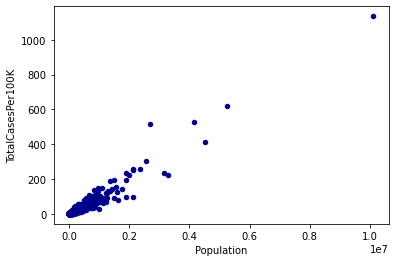

In [42]:
ax1 = df6.plot.scatter(x='Population',
                      y='TotalCasesPer100K',
                      c='DarkBlue')